# Telecom Churn Case Study

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('telecom_churn_data.csv')
data.shape

(99999, 226)

In [5]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [6]:
# inspecting columns
sorted(list(data.columns))

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_

In [7]:
list(filter(lambda x : "vbc" in x, sorted(data.columns)))

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [8]:
# rename vbc columns to keep format uniform
data.rename(columns = {'jun_vbc_3g': 'vbc_3g_6',
                       'jul_vbc_3g': 'vbc_3g_7',
                       'aug_vbc_3g': 'vbc_3g_8',
                       'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [9]:
months = ['_6', '_7', '_8', '_9']

# util functions

def isMonthColumn(columnName):
    return len(list(filter(lambda x: x in columnName, months))) > 0

def isLastMonthColumn(columnName):
    return months[len(months)-1] in columnName

def getMonthColumns(key=None):
    month_cols = list(filter(lambda x : isMonthColumn(x), sorted(data.columns)))
    if key is None:
        return month_cols;
    return list(filter(lambda x: key in x, month_cols))

def getNonMonthColumns():
    return list(filter(lambda x : isMonthColumn(x) == 0, sorted(data.columns)))

def snapMissingValues(columns):
    return pd.concat([data[columns].isnull().sum() / len(data) * 100, data[columns].dtypes],
          axis = 1, keys=['missing%', 'dtype']).sort_values(by='missing%',ascending=False)

In [10]:
# find how many columns are related to month
print("The number of months based columns are:", len(getMonthColumns()))
print("The number of non-months columns are:", len(getNonMonthColumns()))

The number of months based columns are: 220
The number of non-months columns are: 6


## Data Cleaning

### Handling missing values for non month columns

In [11]:
data[getNonMonthColumns()].dtypes

aon                 int64
circle_id           int64
loc_ic_t2o_mou    float64
loc_og_t2o_mou    float64
mobile_number       int64
std_og_t2o_mou    float64
dtype: object

In [12]:
snapMissingValues(getNonMonthColumns())

missing%    dtype
loc_ic_t2o_mou   1.01801  float64
loc_og_t2o_mou   1.01801  float64
std_og_t2o_mou   1.01801  float64
aon              0.00000    int64
circle_id        0.00000    int64
mobile_number    0.00000    int64

In [13]:
data.drop(columns=['circle_id', 'mobile_number', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_og_t2o_mou'], inplace=True)

In [14]:
# inpute the missing values with Zero because these coulmns have meaningful missing values
data[getNonMonthColumns()] = data[getNonMonthColumns()].fillna(0)

### Handling missing values for month columns

Dropping `date` columns as they are of no use

In [15]:
data.drop(columns=getMonthColumns('day') + getMonthColumns('date'), inplace=True)

Analyzing `arpu`columns

In [16]:
snapMissingValues(getMonthColumns('arpu'))

missing%    dtype
arpu_2g_6  74.846748  float64
arpu_3g_6  74.846748  float64
arpu_2g_7  74.428744  float64
arpu_3g_7  74.428744  float64
arpu_2g_9  74.077741  float64
arpu_3g_9  74.077741  float64
arpu_2g_8  73.660737  float64
arpu_3g_8  73.660737  float64
arpu_6      0.000000  float64
arpu_7      0.000000  float64
arpu_8      0.000000  float64
arpu_9      0.000000  float64

Dropping `arpu_2g` and `arpu_3g` columns because they have more than 70% missing values.

In [17]:
data.drop(columns=getMonthColumns('arpu_2g') + getMonthColumns('arpu_3g'), inplace=True)

Analyzing `rech` columns

In [18]:
snapMissingValues(getMonthColumns('rech'))

missing%    dtype
av_rech_amt_data_6  74.846748  float64
count_rech_2g_6     74.846748  float64
total_rech_data_6   74.846748  float64
count_rech_3g_6     74.846748  float64
max_rech_data_6     74.846748  float64
count_rech_2g_7     74.428744  float64
count_rech_3g_7     74.428744  float64
total_rech_data_7   74.428744  float64
av_rech_amt_data_7  74.428744  float64
max_rech_data_7     74.428744  float64
count_rech_2g_9     74.077741  float64
av_rech_amt_data_9  74.077741  float64
total_rech_data_9   74.077741  float64
count_rech_3g_9     74.077741  float64
max_rech_data_9     74.077741  float64
count_rech_2g_8     73.660737  float64
total_rech_data_8   73.660737  float64
av_rech_amt_data_8  73.660737  float64
max_rech_data_8     73.660737  float64
count_rech_3g_8     73.660737  float64
max_rech_amt_9       0.000000    int64
total_rech_amt_6     0.000000    int64
total_rech_amt_7     0.000000    int64
total_rech_amt_8     0.000000    int64
total_rech_amt_9     0.000000    int64
max_rech_amt_8       0.000000    int64
max_rech_amt_7       0.000000    int64
max_rech_amt_6       0.000000    int64
total_rech_num_6     0.000000    int64
total_rech_num_7     0.000000    int64
total_rech_num_8     0.000000    int64
total_rech_num_9     0.000000    int64

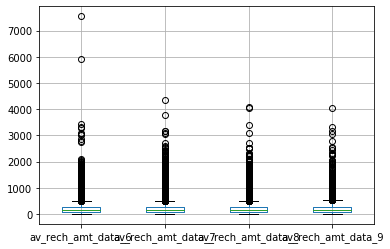

In [19]:
data[getMonthColumns('av_rech_amt')].boxplot()

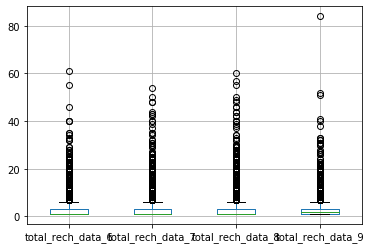

In [20]:
data[getMonthColumns('total_rech_data')].boxplot()

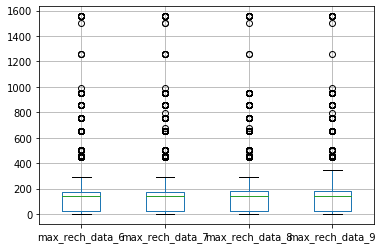

In [21]:
data[getMonthColumns('max_rech_data')].boxplot()

In [22]:
data[getMonthColumns('av_rech_amt')] = data[getMonthColumns('av_rech_amt')].fillna(0)
data[getMonthColumns('total_rech_data')] = data[getMonthColumns('total_rech_data')].fillna(0)
data[getMonthColumns('og_others')] = data[getMonthColumns('og_others')].fillna(0)
data[getMonthColumns('ic_others')] = data[getMonthColumns('ic_others')].fillna(0)
data[getMonthColumns('mou')] = data[getMonthColumns('mou')].fillna(0)

In [23]:
data.drop(columns=getMonthColumns('count'), inplace=True)
data.drop(columns=getMonthColumns('max_rech_data'), inplace=True)
data.drop(columns=getMonthColumns('fb_user'), inplace=True)
data.drop(columns=getMonthColumns('night_pck'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2c'), inplace=True)
data.drop(columns=getMonthColumns('std_ic_t2o'), inplace=True)

In [24]:
data.to_csv('data_clean.csv', index=False)

## Filtering High Value Customers

In [25]:
data = pd.read_csv('data_clean.csv')
data.shape

(99999, 169)

In [26]:
data.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100         0.00         0.00         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  monthly_3g_9  sachet_3g_6  \
0         0.00          0.00          0.00  ...             0            0   
1        18.34         15.74         99.84  ...             0            0   
2        74.81        143.33        220.59  ...             0            0   
3       241.71        123.31        109.01  ...             0            0   
4        58.78         76.96         91.88  ...             0            0   

   sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  \
0            0            0            0   968      30.4       0.0    101.20   
1            0            0            0  1006       0.0       0.0      0.00   
2            0            0            0  1103       0.0       0.0      4.17   
3            0            0            0  2491       0.0       0.0      0.00   
4            0            0            0  1526       0.0       0.0      0.00   

   vbc_3g_9  
0      3.58  
1      0.00  
2      0.00  
3      0.00  
4      0.00  

[5 rows x 169 columns]

In [27]:
data['av_rech_amt_6_7'] = (data['total_rech_amt_6'] 
                               + data['total_rech_data_6']*data['av_rech_amt_data_6'] 
                           + data['total_rech_amt_7'] 
                               + data['total_rech_amt_7']*data['av_rech_amt_data_7'])/2

In [28]:
print("The 70% percentile lies at:", np.quantile(data['av_rech_amt_6_7'], q=0.7))

The 70% percentile lies at: 751.0


In [29]:
data = data[data['av_rech_amt_6_7'] >= np.quantile(data['av_rech_amt_6_7'], q=0.7)]
data.drop(columns='av_rech_amt_6_7', inplace=True)

In [30]:
data.to_csv('data_filtered.csv', index=False)

## Derive Churn

In [31]:
data = pd.read_csv('data_filtered.csv')
data.shape

(30007, 169)

In [32]:
data.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0   197.385   214.816   213.803   21.100         0.00         0.00   
1    34.047   355.074   268.321   86.285        24.11        78.68   
2  1069.180  1349.850  3171.480  500.000        57.84        54.68   
3   378.721   492.223   137.362  166.787       413.69       351.03   
4   119.518   247.435   170.231  160.042        33.89        30.11   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  monthly_3g_9  \
0         0.00         0.00          0.00          0.00  ...             0   
1         7.68        18.34         15.74         99.84  ...             0   
2        52.29         0.00        453.43        567.16  ...             0   
3        35.08        33.46         94.66         80.63  ...             0   
4        22.43        27.84         63.48         54.16  ...             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  \
0            0            0            0            0   968     30.40   
1            0            0            0            0  1006      0.00   
2            0            0            0            0   802     57.74   
3            0            0            0            0   315     21.03   
4            0            0            0            0   902      0.00   

   vbc_3g_7  vbc_3g_6  vbc_3g_9  
0      0.00    101.20      3.58  
1      0.00      0.00      0.00  
2     19.38     18.74      0.00  
3    910.65    122.16      0.00  
4      0.00      0.00      0.00  

[5 rows x 169 columns]

In [33]:
data['churn'] = (data['total_ic_mou_9'] == 0) & (data['total_og_mou_9'] == 0) & (data['vol_2g_mb_9'] == 0) & (data['vol_3g_mb_9'])

In [34]:
data.drop(columns=getMonthColumns('_9'), inplace=True)

In [35]:
data['churn'].value_counts() / len(data) * 100

False    99.546772
True      0.453228
Name: churn, dtype: float64

In [36]:
data.to_csv('data_derived.csv', index=False)

## EDA

In [37]:
data = pd.read_csv('data_derived.csv')
data.shape

(30007, 128)

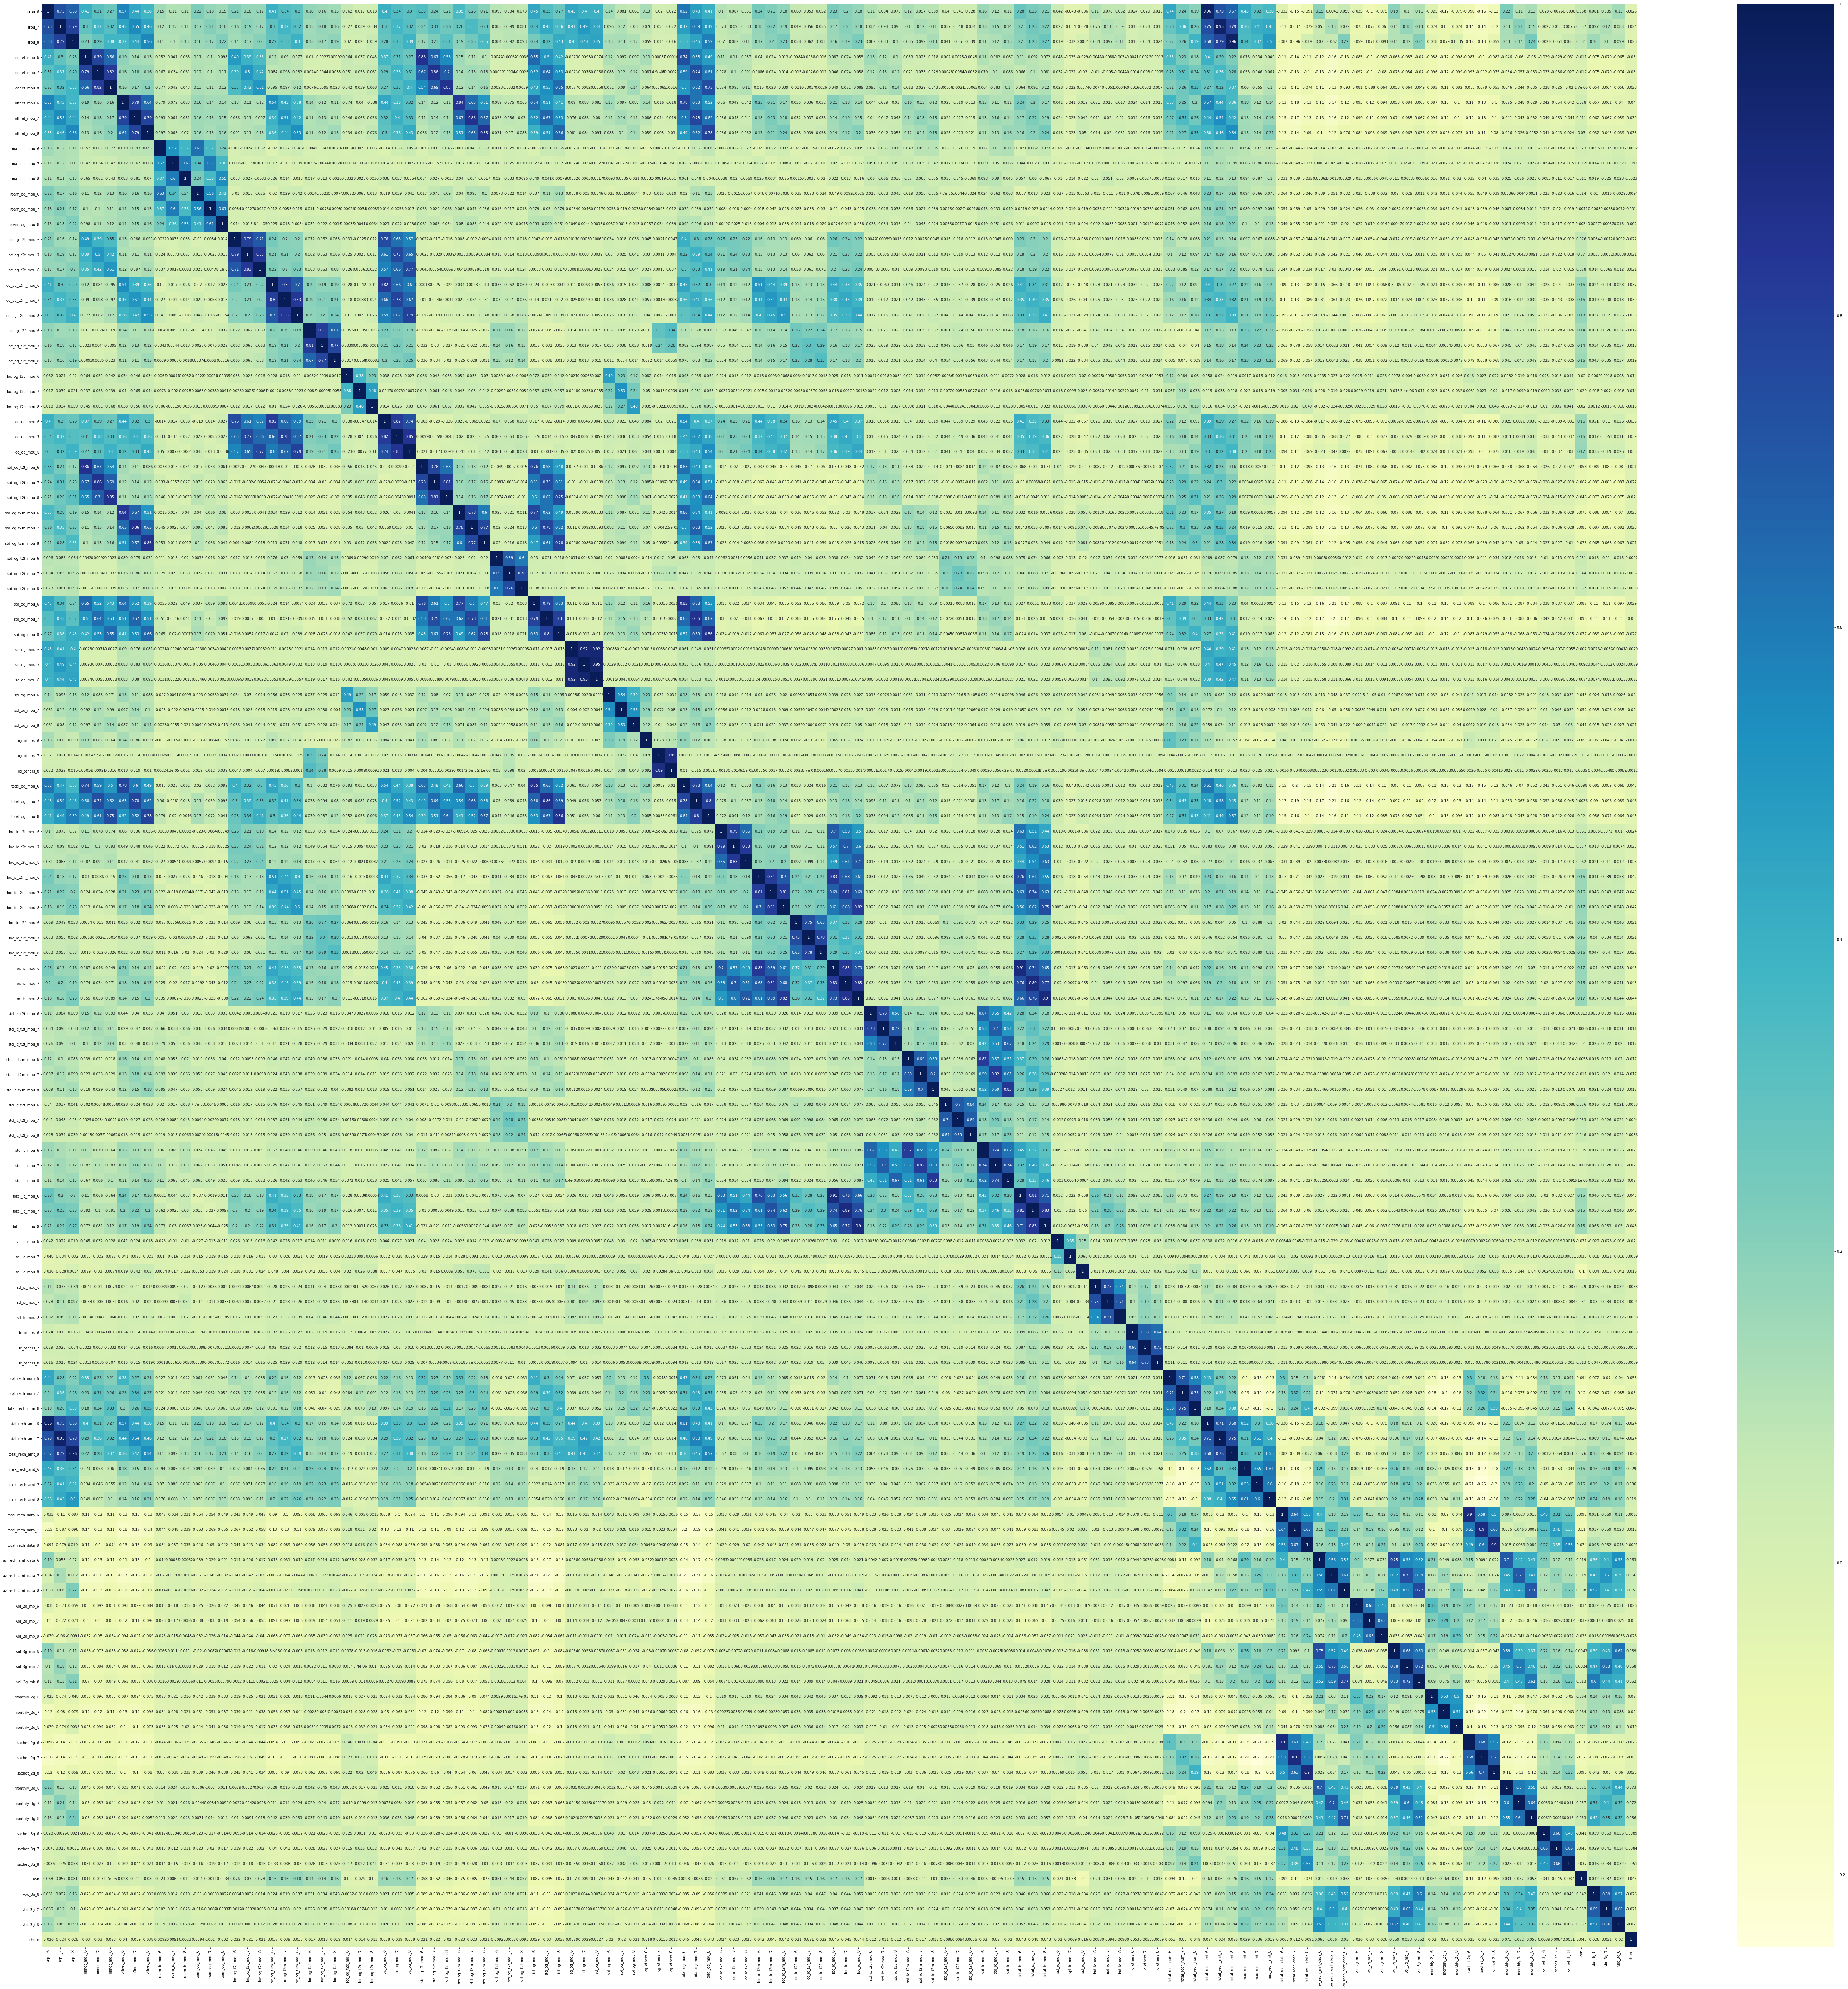

In [205]:
# correlation heatmap between
plt.figure(figsize=(100, 100))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
pd.DataFrame(cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending = False)).head(200)

0
total_rech_amt_8 arpu_8            0.963072
total_rech_amt_6 arpu_6            0.959615
total_rech_amt_7 arpu_7            0.954033
isd_og_mou_8     isd_og_mou_7      0.945463
                 isd_og_mou_6      0.923255
...                                     ...
total_ic_mou_6   loc_ic_t2t_mou_6  0.625853
vbc_3g_7         vol_3g_mb_7       0.625656
total_ic_mou_8   loc_ic_t2t_mou_8  0.625330
std_ic_mou_8     std_ic_mou_6      0.624574
total_og_mou_8   offnet_mou_7      0.623892

[200 rows x 1 columns]

In [39]:
# Drop highly correlated columns
data.drop(columns=getMonthColumns('vol_2g'), inplace=True)
data.drop(columns=getMonthColumns('total_rech_amt_'), inplace=True)
data.drop(columns=getMonthColumns('loc_og_t2t') + getMonthColumns('loc_ic_t2t'), inplace=True)
data.drop(columns=getMonthColumns('loc_og_t2m') + getMonthColumns('loc_ic_t2m'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2t') + getMonthColumns('std_ic_t2t'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2m') + getMonthColumns('std_ic_t2m'), inplace=True)
data.drop(columns=getMonthColumns('total_og_mou') + getMonthColumns('total_ic_mou'), inplace=True)

In [40]:
data.shape

(30007, 92)

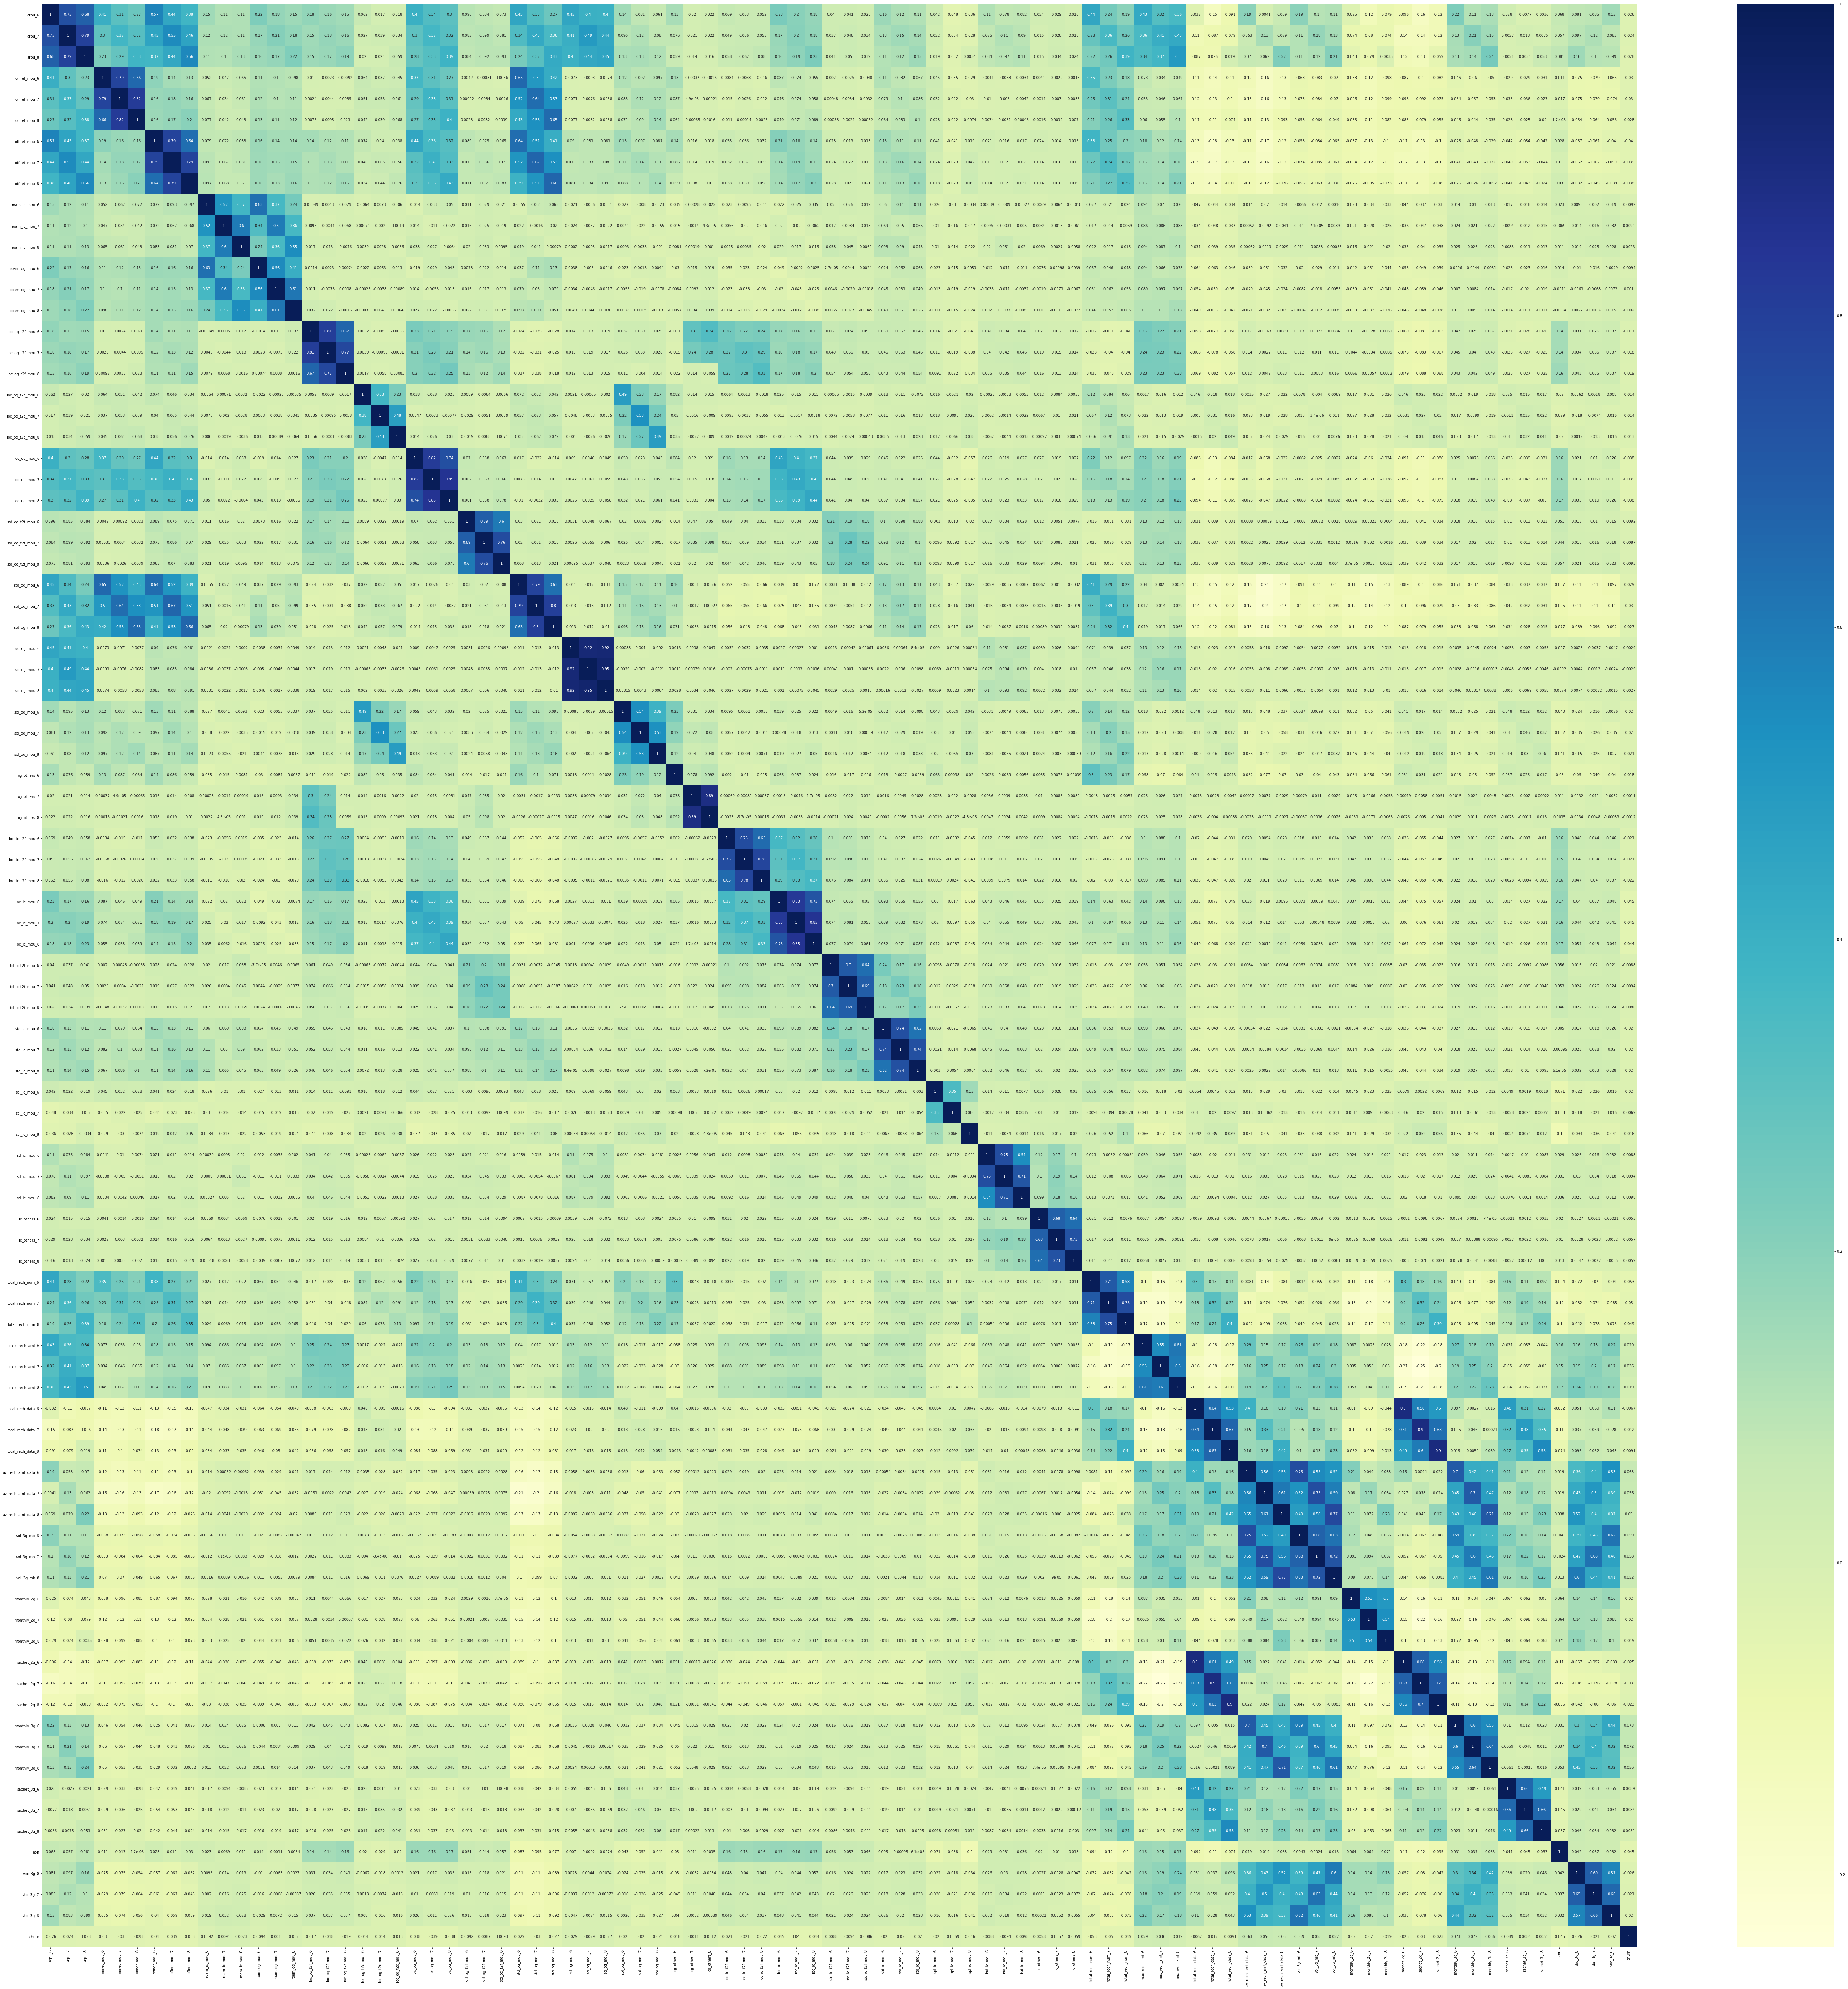

In [209]:
# correlation heatmap between
plt.figure(figsize=(100, 100))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps_uncorrelated.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
data.to_csv('data_final.csv', index=False)

## Modelling

In [42]:
data = pd.read_csv('data_final.csv')
data.shape

(30007, 92)

In [43]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1    34.047   355.074   268.321        24.11        78.68         7.68   
2  1069.180  1349.850  3171.480        57.84        54.68        52.29   
3   378.721   492.223   137.362       413.69       351.03        35.08   
4   119.518   247.435   170.231        33.89        30.11        22.43   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_7  \
0          0.00          0.00          0.00           0.00  ...             1   
1         15.74         99.84        304.76           0.00  ...             0   
2        453.43        567.16        325.91          16.23  ...             0   
3         94.66         80.63        136.48           0.00  ...             0   
4         63.48         54.16         78.34           0.00  ...             0   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  vbc_3g_8  \
0             1            0            0            0   968     30.40   
1             0            0            0            0  1006      0.00   
2             0            0            0            0   802     57.74   
3             0            0            0            0   315     21.03   
4             0            0            0            0   902      0.00   

   vbc_3g_7  vbc_3g_6  churn  
0      0.00    101.20  False  
1      0.00      0.00  False  
2     19.38     18.74  False  
3    910.65    122.16  False  
4      0.00      0.00  False  

[5 rows x 92 columns]

In [44]:
y = data.pop('churn')
X = data

In [45]:
y.value_counts()

False    29871
True       136
Name: churn, dtype: int64

In [46]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
23943   921.676  1303.119   721.297       167.14       199.21       164.79   
14212   280.432   411.249   271.066       134.36       167.21       117.79   
23888   159.659   130.444   130.408         0.00         0.00         0.00   
4936   1426.774   636.743  1582.598       199.16       191.39       134.51   
4788    432.680   452.076   371.765       509.69       584.26       416.63   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
23943       1540.36       1611.69        744.03           0.00  ...   
14212        150.49        181.76        199.43           0.00  ...   
23888          0.00          0.00          0.00           0.00  ...   
4936        2210.91        791.84       1441.18         154.68  ...   
4788         185.91        207.36        216.69           0.00  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
23943             0             1             0            1            2   
14212             0             0             0            0            0   
23888             0             0             0            1            0   
4936              0             0             0            0            0   
4788              0             0             0            0            0   

       sachet_3g_8   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  
23943            1  2532    606.31    210.04   1376.41  
14212            0   522    210.83    298.98    127.79  
23888            0  1468    324.37    417.89    324.33  
4936             0   298      0.00      0.00      0.00  
4788             0  1736      0.00      0.00      0.00  

[5 rows x 91 columns]

In [48]:
y_train.value_counts() / len(y_train) * 100

False    99.538183
True      0.461817
Name: churn, dtype: float64

In [49]:
y_test.value_counts() / len(y_test) * 100

False    99.566811
True      0.433189
Name: churn, dtype: float64

In [50]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

       False       1.00      0.97      0.99      8964
        True       0.12      0.82      0.21        39

    accuracy                           0.97      9003
   macro avg       0.56      0.90      0.60      9003
weighted avg       1.00      0.97      0.98      9003



In [52]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8727  237]
 [   7   32]]
0.972897922914584


In [53]:

                                 
# apply pca to train data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
X_train.info()
churn_pca = pca.fit_transform(X_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21004 entries, 23943 to 29733
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              21004 non-null  float64
 1   arpu_7              21004 non-null  float64
 2   arpu_8              21004 non-null  float64
 3   onnet_mou_6         21004 non-null  float64
 4   onnet_mou_7         21004 non-null  float64
 5   onnet_mou_8         21004 non-null  float64
 6   offnet_mou_6        21004 non-null  float64
 7   offnet_mou_7        21004 non-null  float64
 8   offnet_mou_8        21004 non-null  float64
 9   roam_ic_mou_6       21004 non-null  float64
 10  roam_ic_mou_7       21004 non-null  float64
 11  roam_ic_mou_8       21004 non-null  float64
 12  roam_og_mou_6       21004 non-null  float64
 13  roam_og_mou_7       21004 non-null  float64
 14  roam_og_mou_8       21004 non-null  float64
 15  loc_og_t2f_mou_6    21004 non-null  float64
 16  

In [54]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       9.70
1      18.13
2      24.59
3      29.57
4      33.53
       ...  
86    100.00
87    100.00
88    100.00
89    100.00
90    100.00
Length: 91, dtype: float64


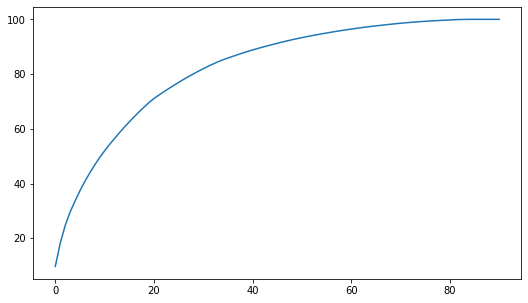

In [55]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [56]:
#PCA and Logistic Regression

# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [57]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9661016949152542

In [58]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# class imbalance
y_train.value_counts()/y_train.shape

# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

[[8639  325]
 [   7   32]]
AUC:    	 0.95


In [59]:
#Random Forest

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [60]:
# fit model
model.fit(X_train, y_train)
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    7.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.0s finished


Best AUC:  0.9735596421074473
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [61]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8957    7]
 [  29   10]]
AUC:    	 0.93


In [62]:
#Choosing best features.
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

# fit model
rf_model.fit(X_train, y_train)

# OOB score
rf_model.oob_score_

# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8959    5]
 [  34    5]]
ROC:    	 0.97


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [63]:
# predictors
features = data.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000003


variables  importance_percentage
0       loc_ic_mou_7              12.044626
1       loc_ic_mou_6               8.165196
2       offnet_mou_7               6.685693
3       loc_ic_mou_8               6.323992
4        vol_3g_mb_7               3.651851
..               ...                    ...
86  std_og_t2f_mou_7               0.002069
87  std_ic_t2f_mou_6               0.001710
88      isd_og_mou_6               0.000000
89      isd_og_mou_7               0.000000
90       og_others_8               0.000000

[91 rows x 2 columns]

In [64]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

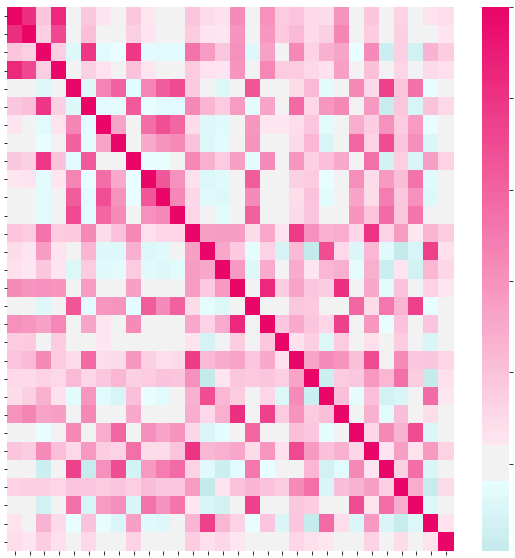

In [65]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)